## Attracteur G avec solveur

### Version 3D

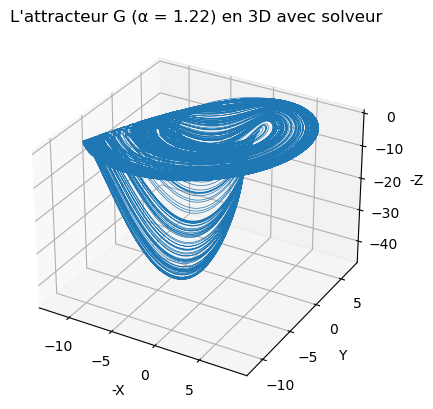

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rossler_attractor(t, u, alpha):
    x, y, z = u
    a = 0.2 + 0.09 * alpha
    b = 0.2 - 0.06 * alpha
    c = 5.7 - 1.18 * alpha

    x_dot = -y - z
    y_dot = x + a * y
    z_dot = b + z * (x - c)

    return [x_dot, y_dot, z_dot]

# Paramètres
alpha = 1.22
initial_conditions = [5.288888888, 0, 0]
t_span = (0, 1000)
num_points = 100000

# Résoudre les équations différentielles
sol = solve_ivp(rossler_attractor, t_span, initial_conditions, args=(alpha,), t_eval=np.linspace(t_span[0], t_span[1], num_points))

# Visualisation en 3D de l'attracteur chaotique
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(-sol.y[0], sol.y[1], -sol.y[2], lw=0.5)
ax.set_xlabel('-X')
ax.set_ylabel('Y')
ax.set_zlabel('-Z')
ax.set_title("L'attracteur G (α = 1.22) en 3D avec solveur")

plt.show()

### Version 2D

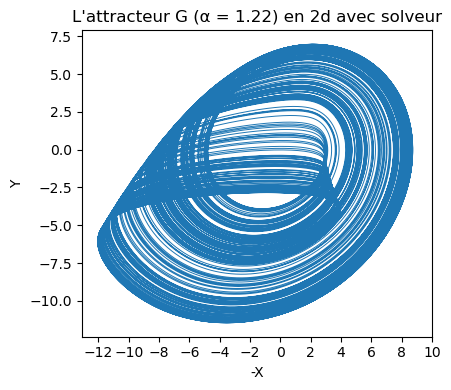

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def rossler_attractor(t, u, alpha):
    x, y, z = u
    a = 0.2 + 0.09 * alpha
    b = 0.2 - 0.06 * alpha
    c = 5.7 - 1.18 * alpha

    dx_dt = -y - z
    dy_dt = x + a * y
    dz_dt = b + z * (x - c)

    return [dx_dt, dy_dt, dz_dt]

# Paramètres
alpha = 1.22
initial_conditions = [5.288888888, 0, 0]
t_span = (0, 1000)
num_points = 100000

# Résoudre les équations différentielles
sol = solve_ivp(rossler_attractor, t_span, initial_conditions, args=(alpha,), t_eval=np.linspace(t_span[0], t_span[1], num_points))

# Visualisation en 3D de l'attracteur chaotique
fig = plt.figure(figsize=(12, 4))

# 2D projection X-Y
ax1 = fig.add_subplot(131)
ax1.plot(-sol.y[0], sol.y[1], lw=0.7)
ax1.set_xlabel('-X')
ax1.set_ylabel('Y')
ax1.set_title("L'attracteur G (α = 1.22) en 2d avec solveur")

# Set x-axis points from -12 to 10 with an interval of 2
ax1.set_xticks(np.arange(-12, 12, step=2))

plt.tight_layout()
plt.show()

## Attracteur G avec RK4

### Version 3D

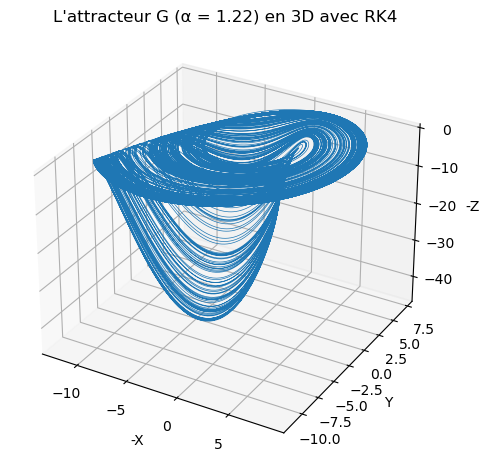

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rossler_attractor(t, u, alpha):
    x, y, z = u
    a = 0.2 + 0.09 * alpha
    b = 0.2 - 0.06 * alpha
    c = 5.7 - 1.18 * alpha

    dx_dt = -y - z
    dy_dt = x + a * y
    dz_dt = b + z * (x - c)

    return np.array([dx_dt, dy_dt, dz_dt])

def runge_kutta_method(system, initial_conditions, t_values, alpha):
    h = t_values[1] - t_values[0]
    num_points = len(t_values)
    
    results = np.zeros((num_points, len(initial_conditions)))
    results[0, :] = initial_conditions
    
    for i in range(1, num_points):
        k1 = h * system(t_values[i-1], results[i-1, :], alpha)
        k2 = h * system(t_values[i-1] + h/2, results[i-1, :] + k1/2, alpha)
        k3 = h * system(t_values[i-1] + h/2, results[i-1, :] + k2/2, alpha)
        k4 = h * system(t_values[i-1] + h, results[i-1, :] + k3, alpha)
        
        results[i, :] = results[i-1, :] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return results

# Paramètres
alpha = 1.22
initial_conditions = [5.288888888, 0, 0]
t_values = np.linspace(0, 1000, 100000)

# Appliquer la méthode de Runge-Kutta pour résoudre les équations différentielles
results = runge_kutta_method(rossler_attractor, initial_conditions, t_values, alpha)

# Visualisation en 3D de l'attracteur chaotique
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(-sol.y[0], sol.y[1], -sol.y[2], lw=0.5)
ax.set_xlabel('-X')
ax.set_ylabel('Y')
ax.set_zlabel('-Z')
ax.set_title("L'attracteur G (α = 1.22) en 3D avec RK4")

# Set x-axis points from -12 to 10 with an interval of 2
ax1.set_xticks(np.arange(-12, 12, step=2))

plt.tight_layout()
plt.show()

### Version 2D

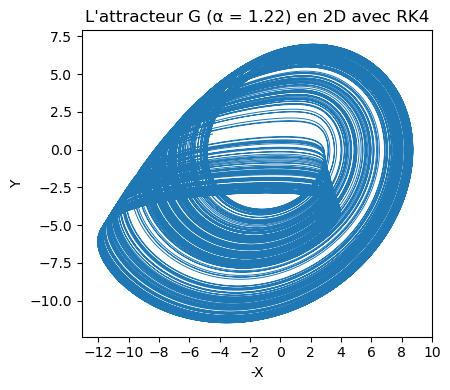

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def rossler_attractor(t, u, alpha): #Dans les fonctions des équations différentielles l'argument "t" est toujorus inclus même s'il n'est pas utilisé.
    x, y, z = u
    a = 0.2 + 0.09 * alpha
    b = 0.2 - 0.06 * alpha
    c = 5.7 - 1.18 * alpha

    dx_dt = -y - z
    dy_dt = x + a * y
    dz_dt = b + z * (x - c)

    return np.array([dx_dt, dy_dt, dz_dt])

def runge_kutta_method(system, initial_conditions, t_values, alpha):
    h = t_values[1] - t_values[0]
    num_points = len(t_values)
    
    results = np.zeros((num_points, len(initial_conditions)))
    results[0, :] = initial_conditions
    
    for i in range(1, num_points):
        k1 = h * system(t_values[i-1], results[i-1, :], alpha)
        k2 = h * system(t_values[i-1] + h/2, results[i-1, :] + k1/2, alpha)
        k3 = h * system(t_values[i-1] + h/2, results[i-1, :] + k2/2, alpha)
        k4 = h * system(t_values[i-1] + h, results[i-1, :] + k3, alpha)
        
        results[i, :] = results[i-1, :] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return results

# Paramètres
alpha = 1.22
initial_conditions = [5.288888888, 0, 0]
t_values = np.linspace(0, 1000, 100000)

# Appliquer la méthode de Runge-Kutta pour résoudre les équations différentielles
results = runge_kutta_method(rossler_attractor, initial_conditions, t_values, alpha)

# Visualisation en 3D de l'attracteur chaotique
fig = plt.figure(figsize=(12, 4))

# 2D projection X-Y
ax1 = fig.add_subplot(131)
ax1.plot(-results[:, 0], results[:, 1], lw=0.7)
ax1.set_xlabel('-X')
ax1.set_ylabel('Y')
ax1.set_title("L'attracteur G (α = 1.22) en 2D avec RK4")

# Set x-axis points from -12 to 10 with an interval of 2
ax1.set_xticks(np.arange(-12, 12, step=2))

plt.tight_layout()
plt.show()

### SECTION POINTS CARRE


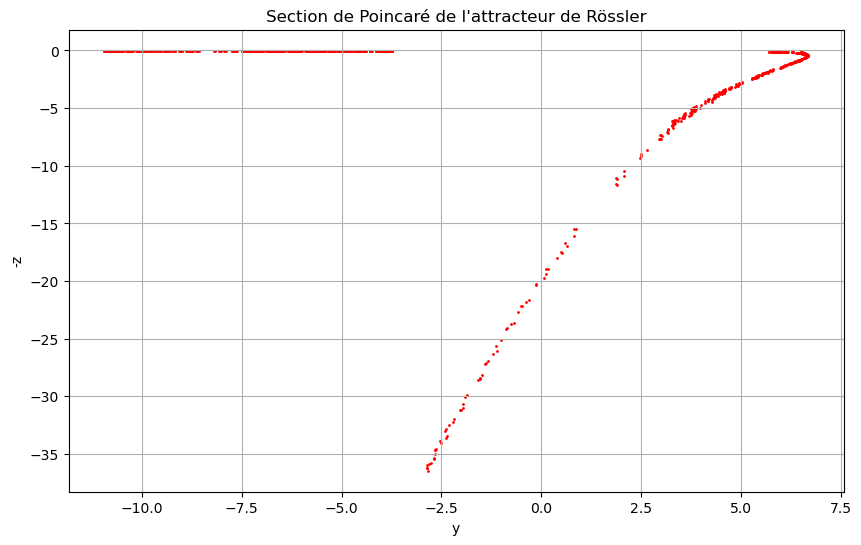

In [8]:
def calculate_singular_points(a, b, c):
    # Calcul des points singuliers x±, y±, z± selon les formules fournies
    x_plus = (c + np.sqrt(c**2 - 4*a*b)) / 2
    x_minus = (c - np.sqrt(c**2 - 4*a*b)) / 2
    y_plus = y_minus = -c / (2*a)
    z_plus = (c + np.sqrt(c**2 - 4*a*b)) / (2*a)
    z_minus = (c - np.sqrt(c**2 - 4*a*b)) / (2*a)

    return x_plus, x_minus, y_plus, y_minus, z_plus, z_minus

a = 0.2 + 0.09 * alpha
b = 0.2 - 0.06 * alpha
c = 5.7 - 1.18 * alpha
# Calcul des points singuliers
x_plus, x_minus, y_plus, y_minus, z_plus, z_minus = calculate_singular_points(a, b, c)

# Paramètres pour la simulation
alpha = 1.22
initial_conditions = [5.288888888, 0, 0]
t_values = np.linspace(0, 1000, 100000)

# Génération des données de l'attracteur
results = runge_kutta_method(rossler_attractor, initial_conditions, t_values, alpha)

# Filtrer pour la section de Poincaré
poincare_section = results[np.isclose(-results[:, 0], -x_minus, atol=0.1)]  # Tolérance ajustable

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(poincare_section[:, 1], -poincare_section[:, 2], color='red', s=1)  # Points de la section de Poincaré
plt.xlabel('y')
plt.ylabel('-z')
plt.title('Section de Poincaré de l\'attracteur de Rössler')
plt.grid(True)
plt.show()


### EXERCICE 03

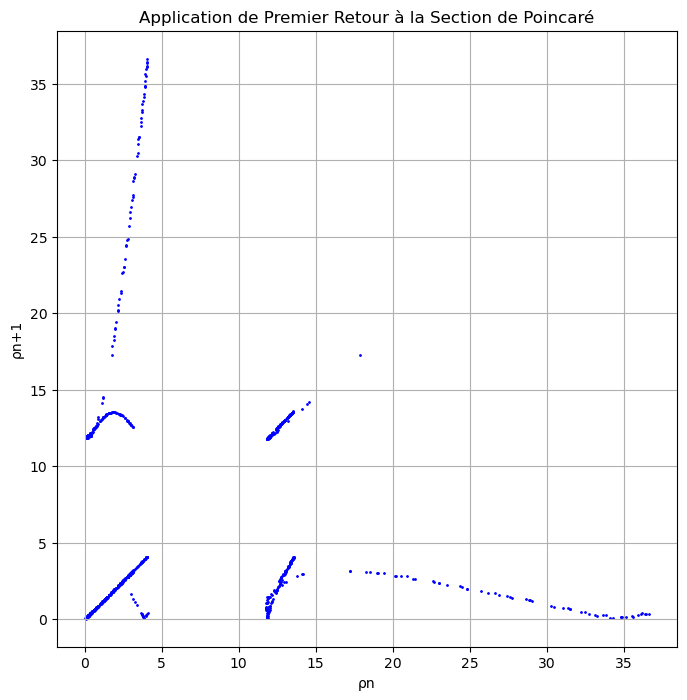

In [10]:

def calculate_rho(points, center):
    # Calcul de la distance euclidienne par rapport au centre
    return np.sqrt(np.sum((points - center)**2, axis=1))

# Paramètres de l'attracteur de Rössler
a = 0.2 + 0.09 * alpha
b = 0.2 - 0.06 * alpha
c = 5.7 - 1.18 * alpha

# Calcul des points singuliers
x_plus, x_minus, y_plus, y_minus, z_plus, z_minus = calculate_singular_points(a, b, c)

# Paramètres pour la simulation
alpha = 1.22
initial_conditions = [5.288888888, 0, 0]
t_values = np.linspace(0, 1000, 100000)

# Génération des données de l'attracteur
results = runge_kutta_method(rossler_attractor, initial_conditions, t_values, alpha)

# Filtrer pour la section de Poincaré
poincare_section = results[np.isclose(-results[:, 0], -x_minus, atol=0.1)]  # Tolérance ajustable

# Centre de l'attracteur (point singulier)
center = np.array([x_minus, y_minus, z_minus])

# Calcul de rho pour chaque point dans la section de Poincaré
rho = calculate_rho(poincare_section, center)

# Construction de l'application de premier retour
# On ignore le dernier point car il n'a pas de point suivant
rho_n = rho[:-1]
rho_n_plus_1 = rho[1:]

# Visualisation
plt.figure(figsize=(8, 8))
plt.scatter(rho_n, rho_n_plus_1, color='blue', s=1)
plt.xlabel('ρn')
plt.ylabel('ρn+1')
plt.title('Application de Premier Retour à la Section de Poincaré')
plt.grid(True)
plt.show()